# Project - COVID-19 New Jersey Trends & Impact on RideSharing Platform

In [267]:
import pandas as pd
# import the seaborn module
import seaborn as sns
import matplotlib.pyplot as plt
import datetime  as dt
import numpy as np
from matplotlib.ticker import PercentFormatter
import os
import missingno as msno # visualize the distribution of NaN values
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly
from datetime import datetime
import dexplot as dxp
# import plotly.graph_objects
# from plotly.subplots import make_subplots

#### COVID-19 Dataset --> We have taken New Jersey covid19 data
source --> 
https://covidtracking.com/api/v1/states/daily.csv

#### X Dataset --> We are trying to observe the impact of COVID-19 on the stock prices of major Ridesharing Players (Uber + Lyft)
Source -->
https://finance.yahoo.com/quote/UBER/history?p=UBER

https://finance.yahoo.com/quote/LYFT/history?p=LYFT

Project Git Repository --> https://github.com/marif1901/COVID19_NJ_ImpactAnalysis

## Part 1: Data Pre Processing (10%)

In [175]:
cov_url= 'https://raw.githubusercontent.com/marif1901/COVID19_NJ_ImpactAnalysis/master/COVID19_Data_NJ.csv'
x_uber_url= "https://raw.githubusercontent.com/marif1901/COVID19_NJ_ImpactAnalysis/master/UBER_1Y.csv"
x_lyft_url= "https://raw.githubusercontent.com/marif1901/COVID19_NJ_ImpactAnalysis/master/LYFT_1Y.csv"


###### Reading Datasets

In [176]:
covid = pd.read_csv(cov_url,sep=',')# use sep="," for coma separation. 
xuber = pd.read_csv(x_uber_url,sep=',')
xlyft = pd.read_csv(x_lyft_url,sep=',')
print(covid.columns)
print(xuber.columns)
print(xlyft.columns)

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'hash', 'dateChecked', 'death', 'hospitalized', 'total',
       'totalTestResults', 'posNeg', 'fips', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease', 'dailypositvecases', 'dailynegativecases',
       'dailytestingdone', 'dailydeath'],
      dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


###### Preprocessing on COVID Data

In [177]:
covid_cols= ['date','dailypositvecases','dailynegativecases','dailydeath','dailytestingdone',
             'positiveIncrease','negativeIncrease', 'deathIncrease','totalTestResultsIncrease',
            'positive', 'negative', 'death','totalTestResults']
covid_sel= covid[covid_cols].copy()

covid_cols= ['date','dailypositvecases','dailynegativecases','dailydeath','dailytestingdone',
             'positiveIncrease','negativeIncrease', 'deathIncrease','totalTestResultsIncrease',
            'cumpositive', 'cumnegative', 'cumdeath','cumtotalTestResults']

covid_sel.columns=  covid_cols

###### Dropping rows where data is NA

In [255]:
sum(pd.isna(covid_sel['date']))
index = covid_sel[pd.isna(covid_sel['date'])].index
covid_sel.drop(index , inplace=True)

###### Converting date to proper %Y%m%d format

In [178]:
covid_sel['date']= covid_sel['date'].astype(str)
covid_sel['date'] = pd.to_datetime(covid_sel['date'], format='%Y%m%d').dt.strftime("%Y-%m-%d");


In [179]:
int_col= ['dailypositvecases','dailynegativecases','dailydeath','dailytestingdone',
             'positiveIncrease','negativeIncrease', 'deathIncrease','totalTestResultsIncrease',
            'cumpositive', 'cumnegative', 'cumdeath','cumtotalTestResults']
covid_sel[int_col] = covid_sel[int_col].convert_objects(convert_numeric=True)
covid_sel.head()

,date,dailypositvecases,dailynegativecases,dailydeath,dailytestingdone,positiveIncrease,negativeIncrease,deathIncrease,totalTestResultsIncrease,cumpositive,cumnegative,cumdeath,cumtotalTestResults
0,2020-04-26,3515,5943,75,9458,3515,5943,75,9458,109038,114106,5938,223144
1,2020-04-25,3327,4397,246,7724,3327,4397,246,7724,105523,108163,5863,213686
2,2020-04-24,2207,3607,249,5814,2207,3607,249,5814,102196,103766,5617,205962
3,2020-04-23,4124,4365,305,8489,4124,4365,305,8489,99989,100159,5368,200148
4,2020-04-22,3478,3355,310,6833,3478,3355,310,6833,95865,95794,5063,191659


In [180]:
print('Min Date observed for COVID : ' + str(covid_sel['date'].min()))
print('Max Date observed for COVID: ' + str(covid_sel['date'].max()))

Min Date observed for COVID : 2020-03-05
Max Date observed for COVID: 2020-04-26


###### Preprocessing on X Data

In [181]:
x_cols= ['Date','Close','Volume']

xuber_sel= xuber[x_cols].copy()
xlyft_sel= xlyft[x_cols].copy()

x_cols= ['date','UberClosingPrice','UberVolume']
xuber_sel.columns= x_cols

x_cols= ['date','LyftClosingPrice','LyftVolume']
xlyft_sel.columns=x_cols

In [182]:
xuber_sel.date= pd.to_datetime(xuber_sel['date']).dt.strftime('%Y-%m-%d')
xlyft_sel.date=pd.to_datetime(xlyft_sel['date']).dt.strftime('%Y-%m-%d')

In [183]:
x_sel= pd.merge(xuber_sel, xlyft_sel,on='date')
print('Min Date observed for X : ' + str(x_sel['date'].min()))
print('Max Date observed for X: ' + str(x_sel['date'].max()))

Min Date observed for X : 2019-05-10
Max Date observed for X: 2020-04-24


In [184]:
x_sel.head()

,date,UberClosingPrice,UberVolume,LyftClosingPrice,LyftVolume
0,2019-05-10,41.570000,186322500,51.090000,23111200
1,2019-05-13,37.099998,79442400,48.150002,10007400
2,2019-05-14,39.959999,46661100,50.520000,7007400
3,2019-05-15,41.290001,36086100,54.040001,7909300
4,2019-05-16,43.000000,38115500,55.599998,7101700


###### Merging COVID data with X Data for Analysing impact in the same time frame

In [279]:
comb_df= covid_sel.merge(x_sel, how='inner', on='date')
comb_df=comb_df.drop_duplicates()
print('Min Date observed for comb_df : ' + str(comb_df['date'].min()))
print('Max Date observed for comb_df: ' + str(comb_df['date'].max()))

Min Date observed for comb_df : 2020-03-05
Max Date observed for comb_df: 2020-04-24


###### Filtering 4 weeks timeframe for Analysis

In [280]:

st_dt= pd.to_datetime('2020-03-23').strftime('%Y-%m-%d')
print(st_dt)
end_dt= pd.to_datetime('2020-04-19').strftime('%Y-%m-%d')
print(end_dt)

comb_df = comb_df[ (comb_df['date']>=st_dt) & (comb_df['date']<=end_dt)] 

print('Min Date observed for comb_df : ' + str(comb_df['date'].min()))
print('Max Date observed for comb_df: ' + str(comb_df['date'].max()))

comb_df.head()

2020-03-23
2020-04-19
Min Date observed for comb_df : 2020-03-23
Max Date observed for comb_df: 2020-04-17


,date,dailypositvecases,dailynegativecases,dailydeath,dailytestingdone,positiveIncrease,negativeIncrease,deathIncrease,totalTestResultsIncrease,cumpositive,cumnegative,cumdeath,cumtotalTestResults,UberClosingPrice,UberVolume,LyftClosingPrice,LyftVolume
5,2020-04-17,3150,2469,322,5619,3150,2469,322,5619,78467,78982,3840,157449,28.000000,34129800,29.070000,8437400
6,2020-04-16,4287,3522,362,7809,4287,3522,362,7809,75317,76513,3518,151830,27.030001,24088700,27.139999,6881400
7,2020-04-15,2206,2041,351,4247,2206,2041,351,4247,71030,72991,3156,144021,27.410000,18720900,28.389999,6825200
8,2020-04-14,4240,6065,362,10305,4240,6065,362,10305,68824,70950,2805,139774,27.750000,32625300,30.500000,5713400
9,2020-04-13,2734,0,93,2734,2734,0,93,2734,64584,64885,2443,129469,27.990000,24671600,30.660000,6697400


###### Assigning Week Number

In [281]:
comb_df['WeekNum'] = ((pd.to_datetime(comb_df['date']) - pd.to_datetime(st_dt)).dt.days)//7 +1
# weeklycount=comb_df['WeekNum'].value_counts()
# weeklycount

###### Checking Nullity and Data Completeness

Text(0.5, 1.0, 'Data Completenss Check for Combined data')

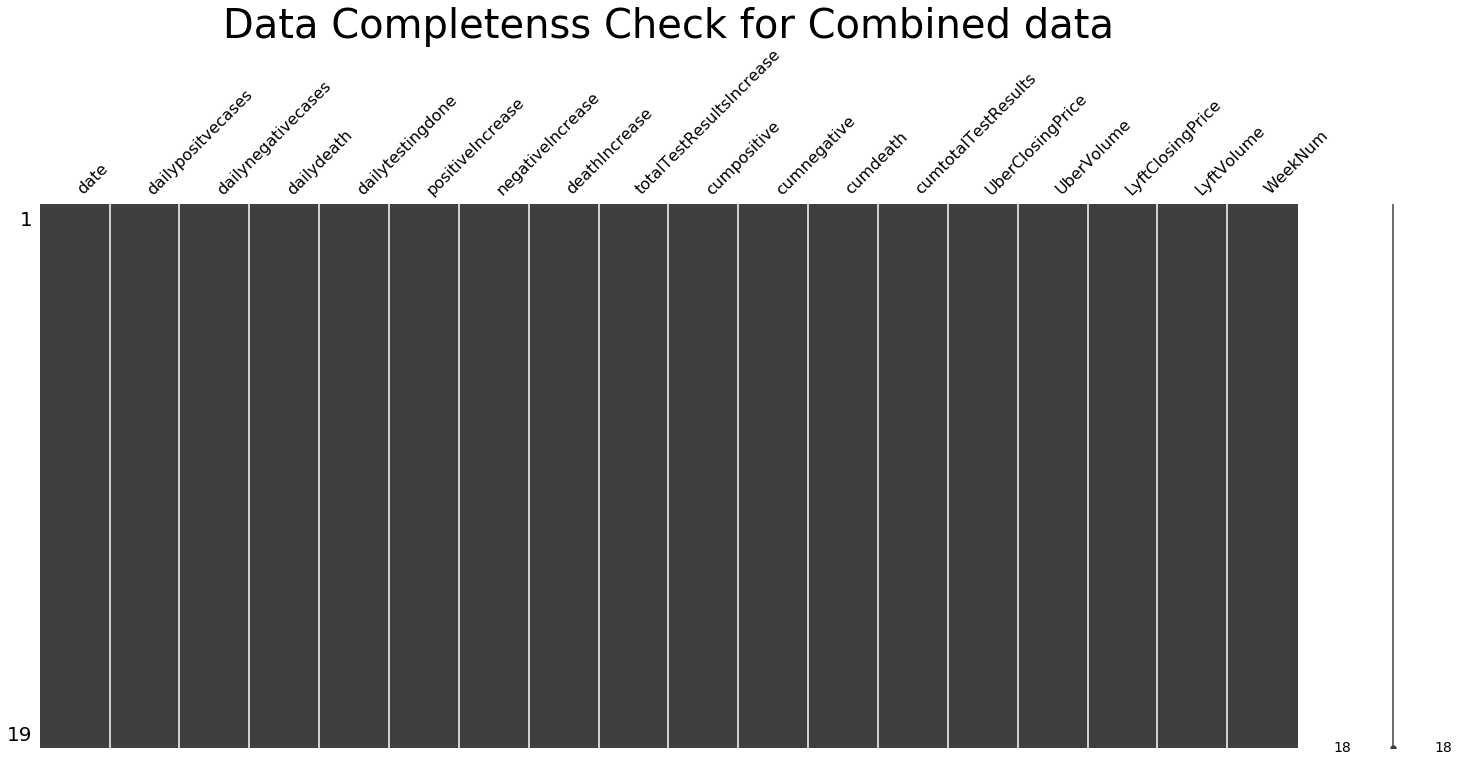

In [282]:
msno.matrix(comb_df)
plt.title('Data Completenss Check for Combined data', size = 40)

# msno.bar(comb_df)
# plt.title('Visualization of Nullity by column for Combined data', size = 10)

###### No Nullity found above

In [308]:
comb_df= comb_df.sort_values(by="date")

## Part 2: General Trends in Covid + X Data (10%)

###### PDF and CDF of COVID 19 Growth

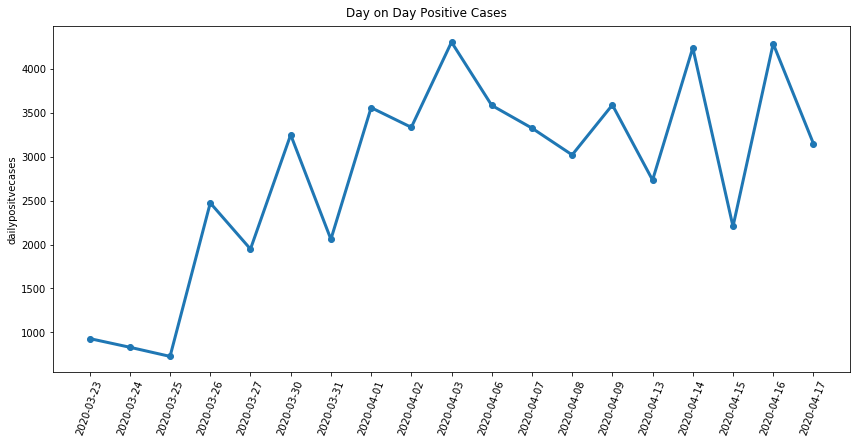

In [292]:
var= 'date'
dxp.aggplot(agg='dailypositvecases', data=comb_df, groupby=var, kind='line', aggfunc='median',title="Day on Day Positive Cases ", xlabel=var,rot=70)


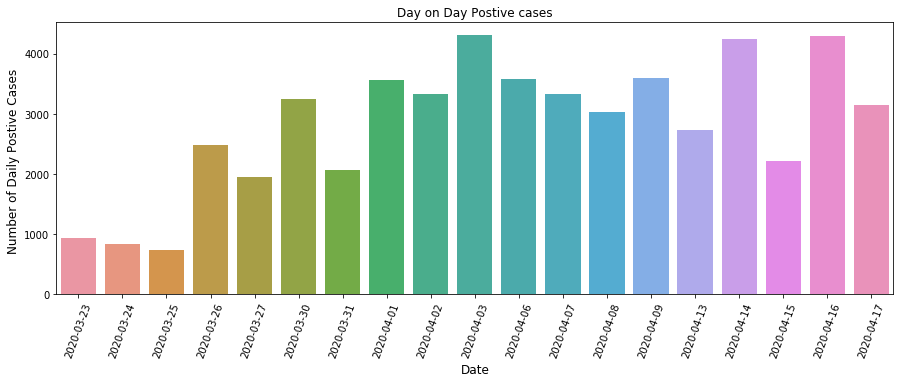

In [309]:
# Plotting a bar graph of the number of occurences of each unique addr2 in the column 'addr2'
plt.figure(figsize=(15,5))
sns.barplot(comb_df.date, comb_df.dailypositvecases, alpha=1)
plt.title('Day on Day Postive cases')
plt.ylabel('Number of Daily Postive Cases ', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=70)
plt.show()

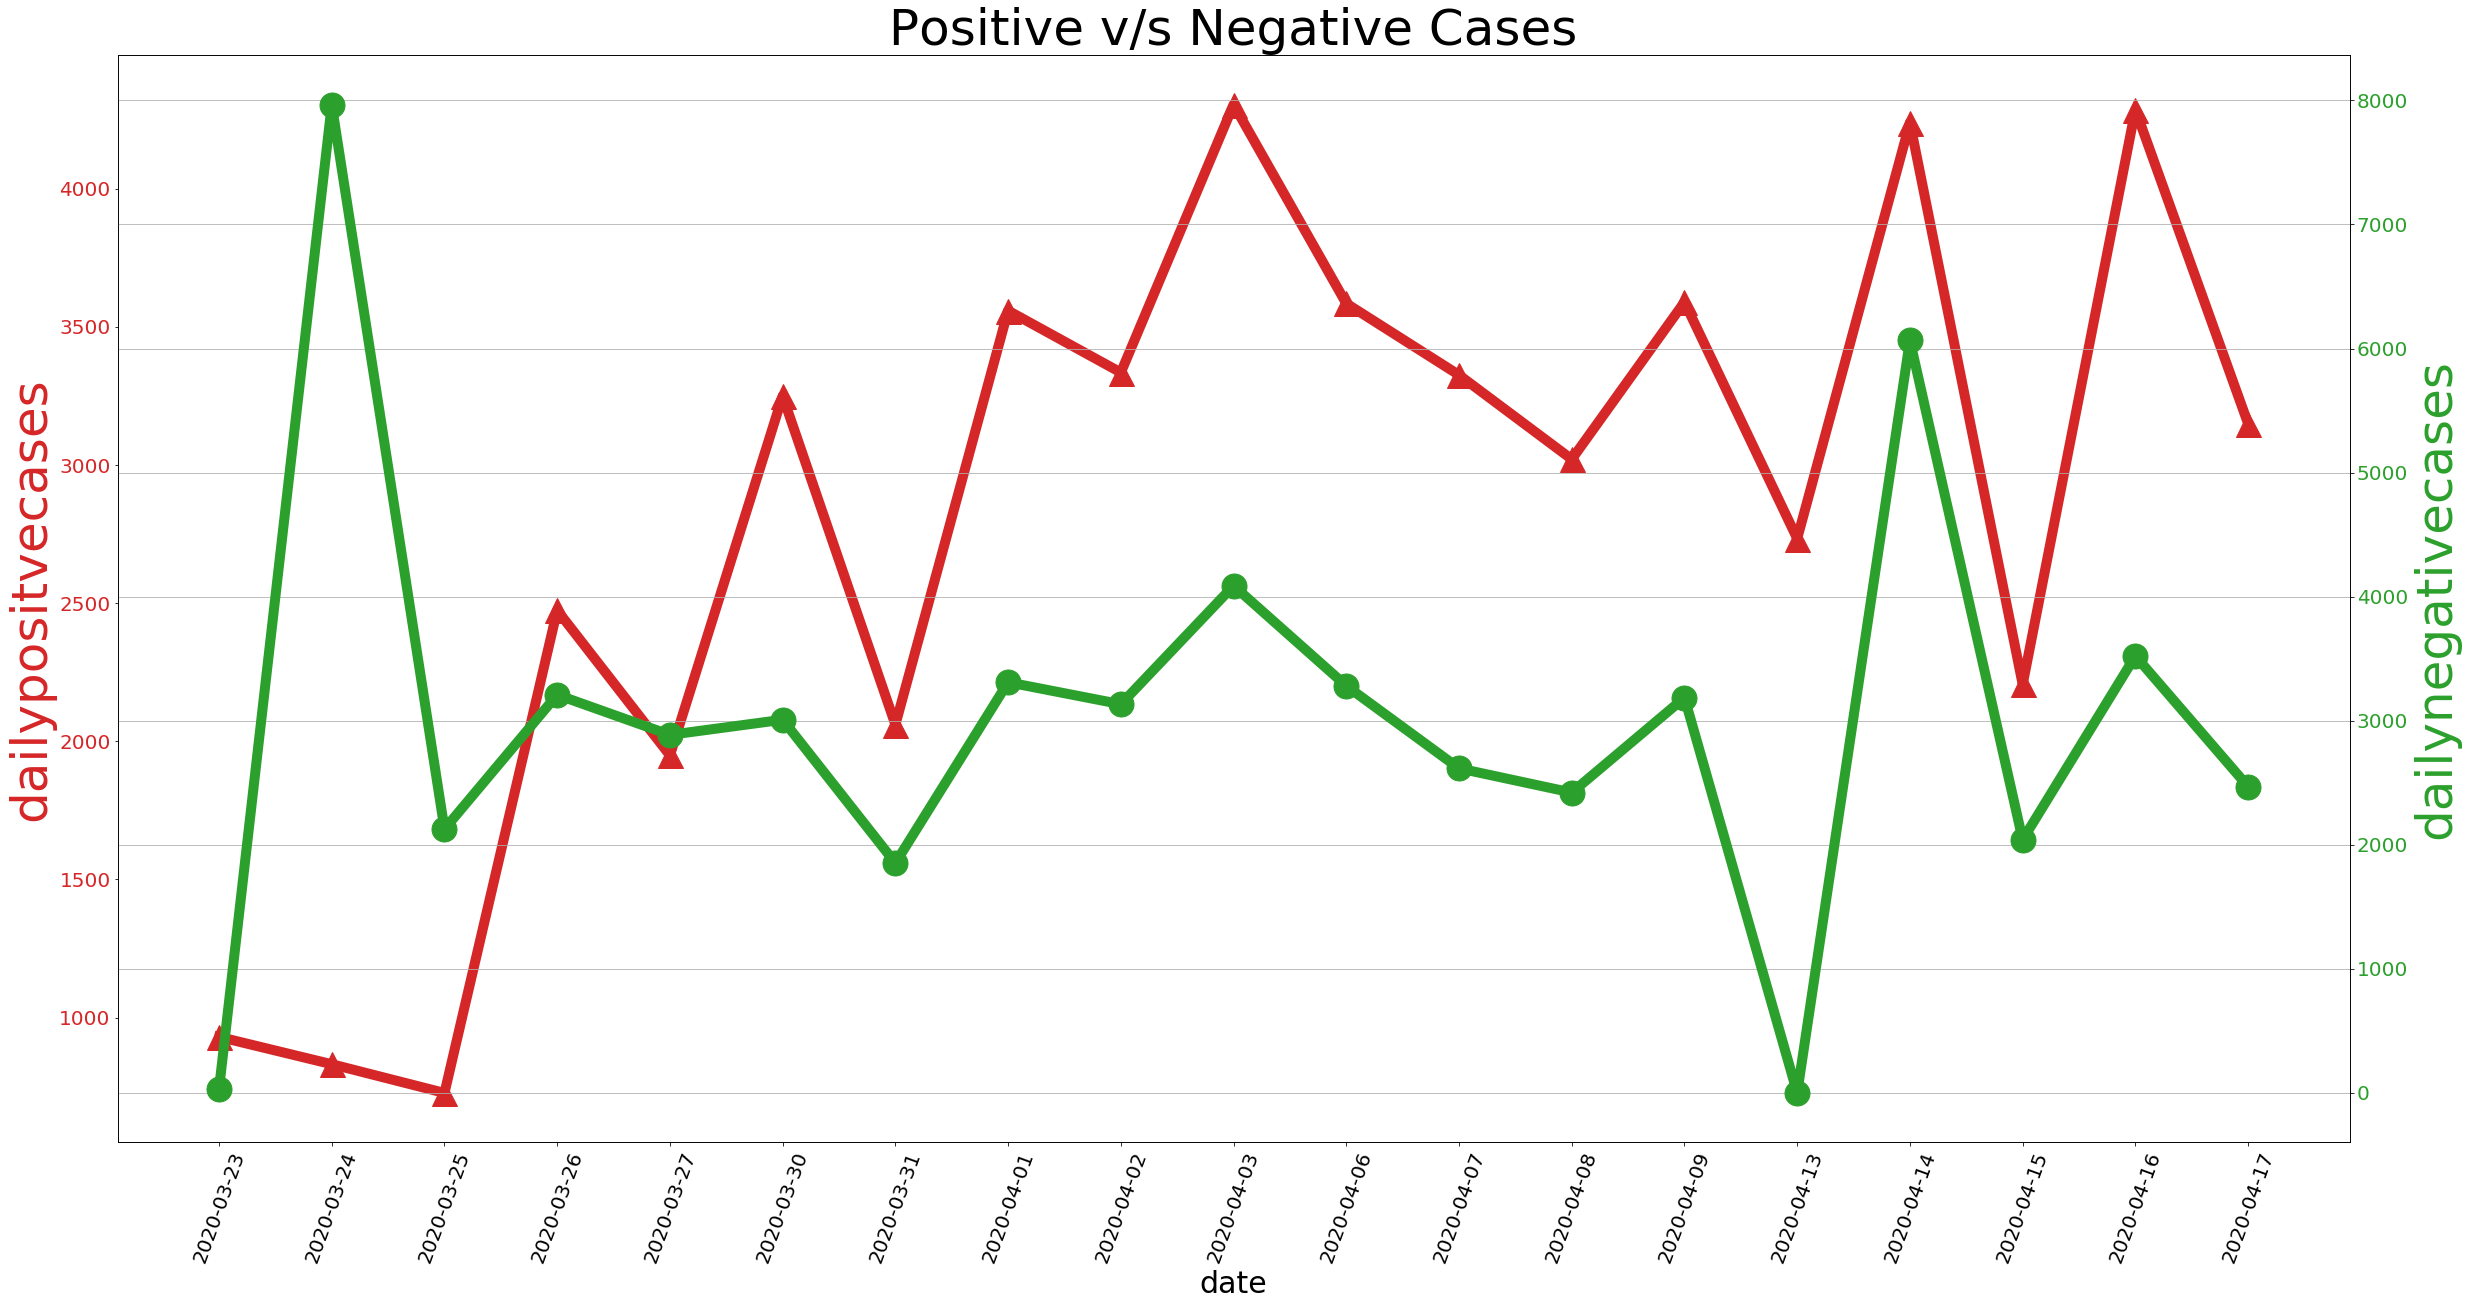

In [298]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec



fig = plt.figure(figsize=(40,20))
gs = gridspec.GridSpec(1, 1)

#----  Best Customers----#
data = comb_df
data = data.sort_values(by="date")

ax1 = plt.subplot(gs[0, 0])
var= 'dailypositvecases'

color = 'tab:red'
ax1.set_xlabel('date',size=30)
ax1.set_ylabel(var, color=color,size=50)
ax1.plot(data['date'], data[var],color=color,marker='^',lw=10,ms=25)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=70)
ax1.set_xticklabels([])
ax1.tick_params(axis='both', which='major', labelsize=20)

color = 'tab:green'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
var= 'dailynegativecases'
ax2.set_ylabel(var, color=color,size=50)
ax2.plot(data['date'], data[var],color=color,marker='o',lw=10,ms=25)
ax2.tick_params(axis='y', labelcolor=color)
plt.grid(True)
plt.title('Positive v/s Negative Cases',size= 50)
# ax2.set_xticklabels([])

ax2.tick_params(axis='both', which='major', labelsize=20)

# plt.suptitle('Customer Cohorts & their Purchase Trend', y=0.94, fontsize=60)
plt.show()



## Part 3: Required Inferences (50%)

### 3.1 Predicting the COVID19 fatality & #cases over next one week

#### 3.1.1 AR(3)

#### 3.1.2 AR(5)

#### 3.1.3 EWMA with alpha = 0.5

#### 3.1.4 EWMA with alpha = 0.8

### 3.2 Apply the Wald’s test, Z-test, and t-test to check whether the mean of COVID19 deaths and #cases are different from the first week to the last week

#### 3.2.1 Use MLE for Wald’s test as the estimator

#### 3.2.2 Two-sample version of Wald and t-tests

#### 3.2.3 Z-test

### 3.3 Equality of distributions (distribution of first week and last week), using K-S test and Permutation test

#### 3.3.1 K-S Test

#### 3.3.2 Permutation Test

### 3.4 Pearson correlation for #deaths and Stock Prices,  #cases and Stock Prices


#### 3.4.1 Pearson correlation for #deaths and Stock Price

#### 3.4.2 Pearson correlation for #cases and Stock Price

### 3.5 Posterior Distributions for daily deaths parameter estimator 

#### 3.5.1 First week to Second week

#### 3.5.2 Second week to third week

#### 3.5.3 Third week to fourth week

#### 3.5.4 Plot all posterior distributions on one graph

#### 3.5.5 Report the MAP for all posteriors

## Part 4: Creative Inferences (30%)

### Hypothesis1: Due to COVID outbreak Stock prices of Uber+Lyft decreased significantly

#### Inference1: Below are the inference for H1

### Hypothesis2: Due to Uber Lyft being functional Covid Spread Quickly and once they were shut spread went down, pre v/s post lockdown impact on spread

#### Inference2: Below are the inference for H2

### Inference3: linear regression to find the impact on Stock Prices of Uber +Lyft because of the severity of covid19  duration